In [14]:
# The Trapped Knight problem is a chess-based problem apparently invented by Neil Sloane and 
# giving rise to a finite number sequence
#The squares of an infinite chess board are numbered in a spiral, as in this diagram:

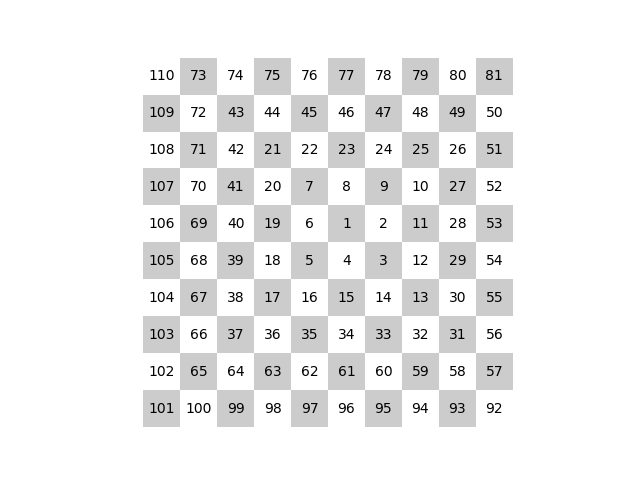

In [15]:
from IPython.display import Image
Image(filename='chessboard.png') 

In [16]:
# A knight, starts at square 1 and moves according to the normal rules of chess, except that where there is more than one 
# possible move, it chooses the square with the smallest number that it has not previously visited. So the first move is to 
# square 10, the second to square 3, and so on.

# The interesting thing about the sequence is that it terminates, at step 2016 on square 2084, 
# where it has no further legal moves to make. [1, 10, 3, 6, 9, 4, 7, 2, 5, ..., 2880, 2467, 2084]

1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14, 29, 32, 15, 12, 27, 24, 45, 20, 23, 44, 41, 18, 35, 38, 19, 16, 33, 30, 53, 26, 47, 22, 43, 70, 21, 40, 17, 34, 13, 28, 25, 46, 75, 42, 69, 104, 37, 62, 95, 58, 55, 86, 51, 48, 77, 114, 73, 108, 151, 68, 103, 64, 67, 36, 39, 66, 63, 96, 59, 56, 87, 52, 49, 78, 115, 74, 71, 106, 149, 102, 99, 140, 61, 94, 31, 54, 85, 50, 79, 116, 161, 76, 113, 72, 107, 150, 201, 146, 65, 98, 139, 60, 93, 90, 129, 176, 125, 82, 119, 164, 217, 160, 111, 154, 205, 264, 331, 200, 101, 142, 97, 138, 187, 92, 89, 128, 175, 84, 81, 118, 163, 216, 159, 110, 153, 204, 105, 148, 199, 144, 147, 100, 141, 190, 137, 186, 91, 130, 57, 88, 127, 174, 83, 80, 117, 162, 215, 112, 109, 152, 203, 262, 329, 198, 195, 252, 143, 192, 249, 188, 135, 132, 179, 234, 297, 230, 123, 120, 165, 218, 279, 214, 157, 208, 267, 334, 263, 330, 259, 196, 253, 318, 191, 248, 313, 244, 133, 180, 235, 298, 177, 126, 173, 122, 167, 220, 281, 350, 277, 158, 155, 206, 265, 202, 261, 328, 197, 254, 145, 194

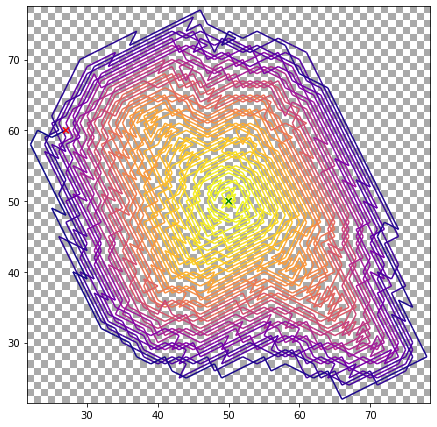

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

DPI = 72
width, height = 700, 525
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI), dpi=DPI)
ax.axis('square')

# Set up the grid: a board of 100 x 100 squares is enough.
n = 100
grid = [[0]*n for i in range(n)]
ix, iy = 0, 0
dx, dy = 1, 0
s = 1
i = 0
while i <= n*n:
    for j in range(s):
        i += 1
        try:
            grid[iy+n//2][ix+n//2] = i
        except IndexError:
            break
        ix += dx
        iy += dy
    dx, dy = dy, dx
    if dy:
        dy = -dy
    else:
        s += 1

def get_next(iy, ix):
    """Get the position of the next square visited by the knight."""

    next_sq = []
    moves = (-1,-2), (-1,2), (1,-2), (1,2), (-2,-1), (-2,1), (2,-1), (2,1)
    for dy, dx in moves:
        jy, jx = iy + dy, ix + dx
        if 0 <= jx < n and 0 <= jy < n:
            if (jy, jx) not in visited:
                next_sq.append((jy, jx))
    if not next_sq:
        # No valid moves – we're done: return None
        return
    return min(next_sq, key=lambda e: grid[e[0]][e[1]])

# Keep track of the visited squares' indexes in the list visited.
visited = []
iy, ix = n//2, n//2
i = 0
# Run the game until there are no valid moves and print the visited squares.
while True:
    i += 1
    visited.append((iy, ix))
    try:
        iy, ix = get_next(iy, ix)
    except TypeError:
        break
print(', '.join(str(grid[iy][ix]) for iy, ix in visited))

visitedValues = []
for i in visited:
    visitedValues.append(grid[i[0]][i[1]])
    
unvisitedNodes = []
for x in range(1, 2084):
    if x not in visitedValues:
        unvisitedNodes.append(x)
        
diferenceRight = []
for x in range(len(unvisitedNodes)-1):
    diferenceRight.append(unvisitedNodes[x+1]-unvisitedNodes[x])
    
        
print('Done in {} steps'.format(i))
print(unvisitedNodes)
from collections import Counter
print(diferenceRight)
print(Counter(diferenceRight))

# Plot the path of the knight on a chessboard in a pleasing colour scheme.
points = np.array(visited).reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(1, len(visited))
lc = LineCollection(segments, cmap='plasma_r', norm=norm)
lc.set_array(np.array(range(len(visited))))
line = ax.add_collection(lc)

ax.scatter([visited[0][0], visited[-1][0]], [visited[0][1], visited[-1][1]],
           c=('g','r'), marker='x', zorder=10)

ptp = np.concatenate( (np.min(points[:,:], axis=0),
                       np.max(points[:,:], axis=0)) ).T

ax.set_xlim(ptp[0][0]-0.5, ptp[0][1]+0.5)
ax.set_ylim(ptp[1][0]-0.5, ptp[1][1]+0.5)

xmin, xmax = ptp[0]
ymin, ymax = ptp[1]
board = np.zeros((ymax-ymin+1, xmax-xmin+1), dtype=int)
board[1::2, ::2] = 1
board[::2, 1::2] = 1

cmap = ListedColormap(['#aaaaaa', 'white'])

ax.imshow(board, extent=[xmin-0.5,xmax+0.5,ymin-0.5,ymax+0.5], cmap=cmap)

plt.savefig('trapped-knight.png', dpi=DPI)
plt.show()

In [25]:
# The first experiment was with the normal problem now we will try to make 
# the 2084 marked as seen from the begining to see if the series is finite anymore, 
# for that we will increase the nxn board

2084, 1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14, 29, 32, 15, 12, 27, 24, 45, 20, 23, 44, 41, 18, 35, 38, 19, 16, 33, 30, 53, 26, 47, 22, 43, 70, 21, 40, 17, 34, 13, 28, 25, 46, 75, 42, 69, 104, 37, 62, 95, 58, 55, 86, 51, 48, 77, 114, 73, 108, 151, 68, 103, 64, 67, 36, 39, 66, 63, 96, 59, 56, 87, 52, 49, 78, 115, 74, 71, 106, 149, 102, 99, 140, 61, 94, 31, 54, 85, 50, 79, 116, 161, 76, 113, 72, 107, 150, 201, 146, 65, 98, 139, 60, 93, 90, 129, 176, 125, 82, 119, 164, 217, 160, 111, 154, 205, 264, 331, 200, 101, 142, 97, 138, 187, 92, 89, 128, 175, 84, 81, 118, 163, 216, 159, 110, 153, 204, 105, 148, 199, 144, 147, 100, 141, 190, 137, 186, 91, 130, 57, 88, 127, 174, 83, 80, 117, 162, 215, 112, 109, 152, 203, 262, 329, 198, 195, 252, 143, 192, 249, 188, 135, 132, 179, 234, 297, 230, 123, 120, 165, 218, 279, 214, 157, 208, 267, 334, 263, 330, 259, 196, 253, 318, 191, 248, 313, 244, 133, 180, 235, 298, 177, 126, 173, 122, 167, 220, 281, 350, 277, 158, 155, 206, 265, 202, 261, 328, 197, 254, 14

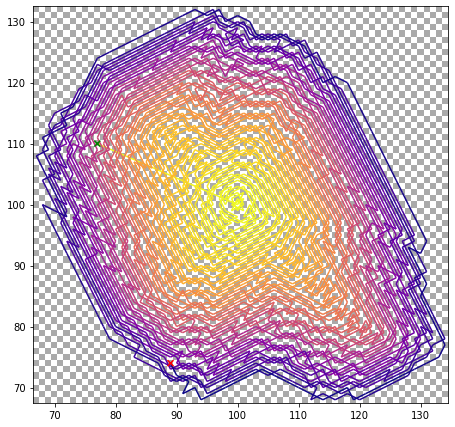

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

DPI = 72
width, height = 700, 525
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI), dpi=DPI)
ax.axis('square')

# Set up the grid: a board of 100 x 100 squares is enough.
n = 200
grid = [[0]*n for i in range(n)]
ix, iy = 0, 0
dx, dy = 1, 0
s = 1
i = 0
while i <= n*n:
    for j in range(s):
        i += 1
        try:
            grid[iy+n//2][ix+n//2] = i
        except IndexError:
            break
        ix += dx
        iy += dy
    dx, dy = dy, dx
    if dy:
        dy = -dy
    else:
        s += 1

def get_next(iy, ix):
    """Get the position of the next square visited by the knight."""

    next_sq = []
    moves = (-1,-2), (-1,2), (1,-2), (1,2), (-2,-1), (-2,1), (2,-1), (2,1)
    for dy, dx in moves:
        jy, jx = iy + dy, ix + dx
        if 0 <= jx < n and 0 <= jy < n:
            if (jy, jx) not in visited:
                next_sq.append((jy, jx))
    if not next_sq:
        # No valid moves – we're done: return None
        return
    return min(next_sq, key=lambda e: grid[e[0]][e[1]])

def findTheEnd(x=2084):
    for i in range(200):
        for j in range(200):
            if grid[i][j] == x:
                return (i, j)
        

# Keep track of the visited squares' indexes in the list visited.
end = findTheEnd(2084)
visited = [end]
iy, ix = n//2, n//2
i = 0
# Run the game until there are no valid moves and print the visited squares.
while True:
    i += 1
    visited.append((iy, ix))
    try:
        iy, ix = get_next(iy, ix)
    except TypeError:
        break
print(', '.join(str(grid[iy][ix]) for iy, ix in visited))
print('Done in {} steps'.format(i))

# Plot the path of the knight on a chessboard in a pleasing colour scheme.
points = np.array(visited).reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(1, len(visited))
lc = LineCollection(segments, cmap='plasma_r', norm=norm)
lc.set_array(np.array(range(len(visited))))
line = ax.add_collection(lc)

ax.scatter([visited[0][0], visited[-1][0]], [visited[0][1], visited[-1][1]],
           c=('g','r'), marker='x', zorder=10)

ptp = np.concatenate( (np.min(points[:,:], axis=0),
                       np.max(points[:,:], axis=0)) ).T

ax.set_xlim(ptp[0][0]-0.5, ptp[0][1]+0.5)
ax.set_ylim(ptp[1][0]-0.5, ptp[1][1]+0.5)

xmin, xmax = ptp[0]
ymin, ymax = ptp[1]
board = np.zeros((ymax-ymin+1, xmax-xmin+1), dtype=int)
board[1::2, ::2] = 1
board[::2, 1::2] = 1

cmap = ListedColormap(['#aaaaaa', 'white'])

ax.imshow(board, extent=[xmin-0.5,xmax+0.5,ymin-0.5,ymax+0.5], cmap=cmap)

plt.savefig('trapped-knight.png', dpi=DPI)
plt.show()